# Bunch Commands

In [1]:
from pytao import Tao

In [2]:
%config InlineBackend.figure_format = 'retina' # Nicer plotting
import numpy as np
import matplotlib.pyplot as plt

# Initialize Tao on the CSR beam tracking example

In [3]:
tao=Tao('-init $ACC_ROOT_DIR/bmad-doc/tao_examples/csr_beam_tracking/tao.init -noplot')   

## bunch_params

Bunch statistics can be retrieved from any element as a dict.

In [4]:
stats = tao.bunch_params('end')
stats

{'beta_x': 0.301344571431441,
 'alpha_x': -2.15210498242426,
 'gamma_x': 18.6880945909343,
 'phi_x': 0.0,
 'eta_x': -0.0481905371137911,
 'etap_x': -0.4549396079126,
 'sigma_x': 6.05450515307664e-05,
 'sigma_p_x': 0.000476792569783085,
 'emit_x': 1.21644907935471e-08,
 'norm_emit_x': 9.99817447357517e-07,
 'beta_y': 0.407832041470518,
 'alpha_y': 1.94408133129719,
 'gamma_y': 11.7191680316853,
 'phi_y': 0.0,
 'eta_y': -0.04573012748764,
 'etap_y': 0.0263978956468745,
 'sigma_y': 7.04344819176225e-05,
 'sigma_p_y': 0.000377566143043638,
 'emit_y': 1.21643611549401e-08,
 'norm_emit_y': 9.99806792169124e-07,
 'beta_z': 95.8242405267472,
 'alpha_z': -1.24059169414826,
 'gamma_z': 0.026497134103358,
 'phi_z': 0.0,
 'eta_z': 0.0,
 'etap_z': 0.0,
 'sigma_z': 0.000899458444899532,
 'sigma_p_z': 1.49569438276303e-05,
 'emit_z': 8.44280622161845e-09,
 'norm_emit_z': 6.93926700944241e-07,
 'beta_a': 0.248534940720129,
 'alpha_a': -1.77502786842306,
 'gamma_a': 15.4139118324764,
 'phi_a': 0.0,
 'e

This says that the full beam is saved at this element

In [5]:
stats['beam_saved']

True

## bunch1

Array data from a bunch can be retrieved

In [6]:
tao.bunch1('end', 'x')[0:10]

array([-1.69330723e-07, -4.58071003e-06,  4.46499386e-06, -1.72810357e-06,
        9.38726472e-06,  5.93275539e-05, -6.70634311e-05,  4.15459481e-05,
       -7.45174801e-05,  5.06578908e-05])

## Plot in matplotlib

This can be used to plot particles.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
xdat = tao.bunch1('end', 'x')
pxdat = tao.bunch1('end', 'px')
chargedat = tao.bunch1('end', 'charge')

xdata = 1000*xdat
ydata = 1000*pxdat
weights = chargedat

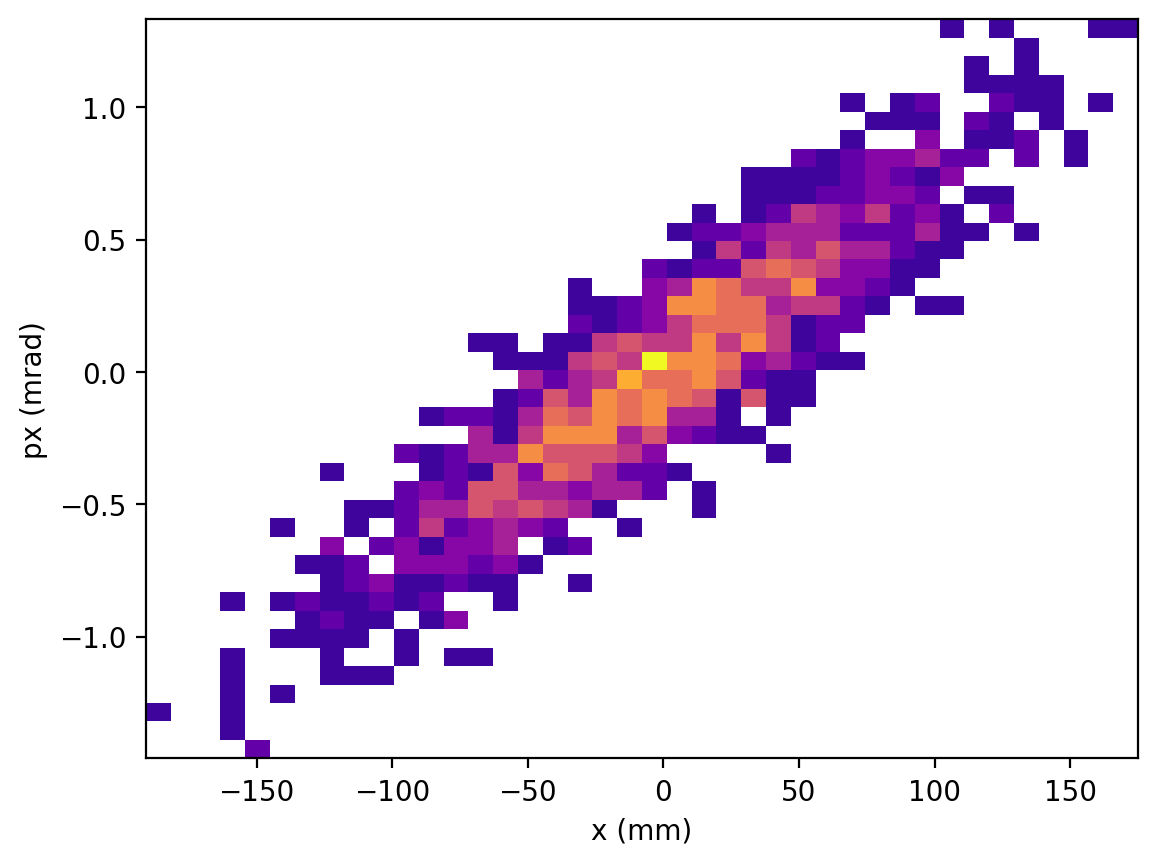

In [9]:
# hist2d

mycmap = plt.get_cmap('plasma') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
myvmin = 1e-30 # something tiny
# Bin particles
plt.hist2d(x=1000*xdata, y=ydata,  bins=2*[40], weights=weights, cmap=mycmap, vmin=myvmin)
plt.xlabel('x (mm)')
plt.ylabel('px (mrad)')
plt.show()

Numpy histogram 2d, with custom color map

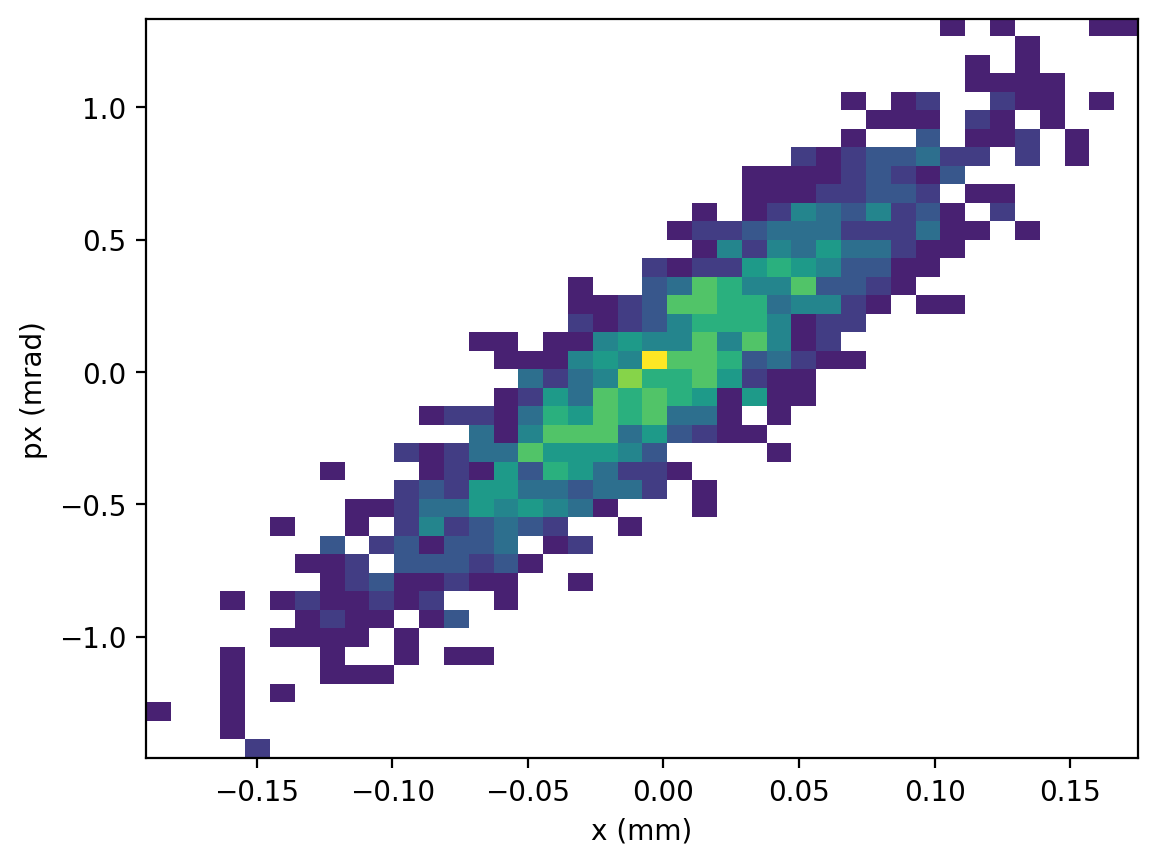

In [10]:
import matplotlib.colors as colors

mycmap = plt.get_cmap('viridis') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
H, xedges, yedges = np.histogram2d(xdata, ydata, weights=chargedat, bins=40)

xmin, xmax = min(xedges), max(xedges)
ymin, ymax = min(yedges), max(yedges)

image = np.flip(H.T, axis=0) # 
imax = np.max(image)
norm=colors.Normalize(vmin=1e-12*imax, vmax=imax)
plt.xlabel('x (mm)')
plt.ylabel('px (mrad)')
plt.imshow(image, cmap=mycmap, norm=norm, extent=[xmin, xmax, ymin, ymax], aspect='auto')

In [11]:
np.min(image), np.max(image)

(0.0, 8.469999999999999e-13)

## Plot in Bokeh

In [12]:
from bokeh.plotting import figure, show, output_notebook
from bokeh import palettes, colors
from bokeh.models import ColumnDataSource, HoverTool
output_notebook(verbose=False, hide_banner=True)

pal = palettes.Viridis[256]
#white=colors.named.white
#pal[0] = white # replace 0 with white

In [13]:
H, xedges, yedges = np.histogram2d(xdata, ydata, weights=chargedat, bins=40)
xmin, xmax = min(xedges), max(xedges)
ymin, ymax = min(yedges), max(yedges)

In [14]:
ds = ColumnDataSource(data=dict(image=[H.transpose()]))   
p = figure(x_range=[xmin, xmax], y_range=[ymin, ymax], title='Bunch at end', 
           x_axis_label='x (mm)', y_axis_label='px (mrad)',
           plot_width=500, plot_height=500)
p.image(image='image', source=ds, 
    x=xmin, y=ymin, dw=xmax-xmin, dh=ymax-ymin, palette=pal)
show(p)

## Data for ParticleGroup

The above commands have been packaged into two functions for easier use, and to easily create ParticleGroup objects

In [15]:
data = tao.bunch_data('end')
data.keys()

dict_keys(['x', 'px', 'y', 'py', 't', 'pz', 'status', 'weight', 'z', 'species'])

In [16]:
from pmd_beamphysics import ParticleGroup

P = ParticleGroup(data=data)
P

<ParticleGroup with 1000 particles at 0x169913700>

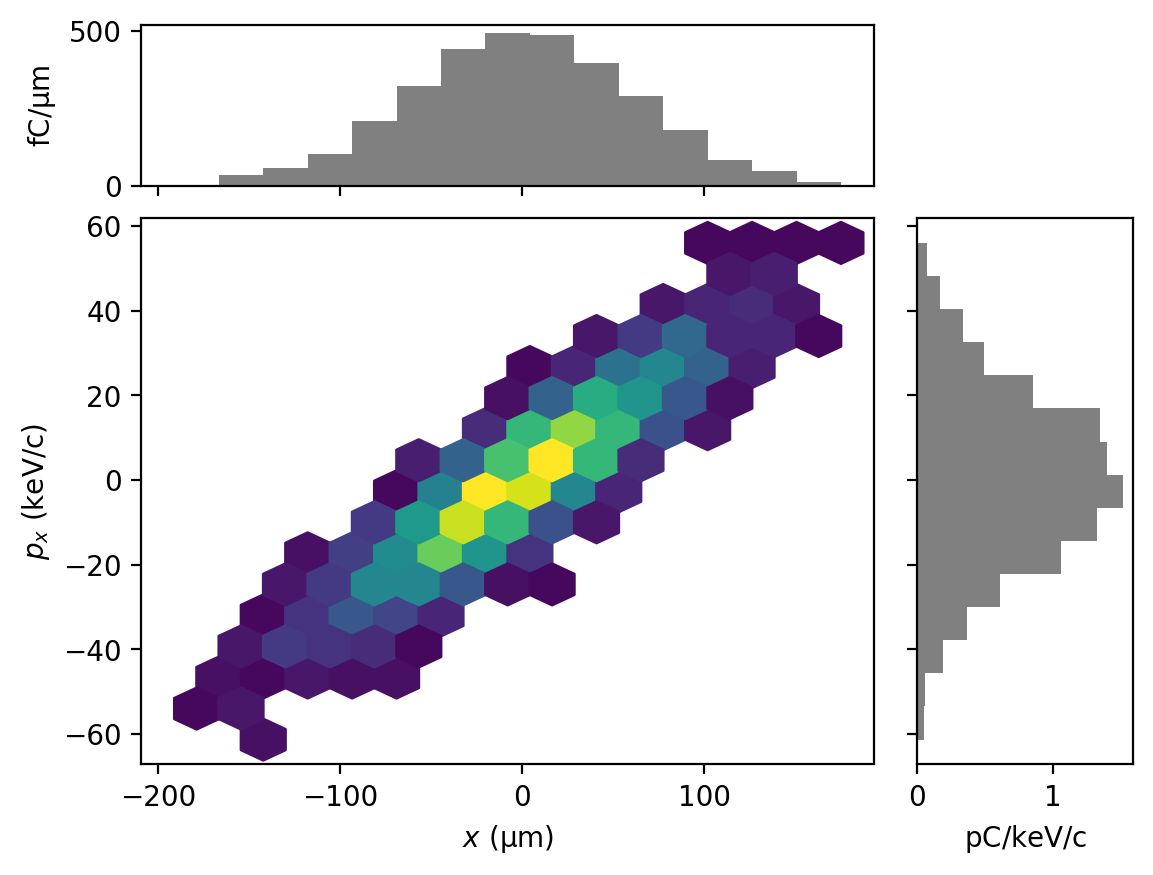

In [17]:
P.plot('x', 'px')

In [18]:
P.twiss('xy')

{'alpha_x': -2.1521049824242637,
 'beta_x': 0.30134283265481904,
 'gamma_x': 18.688202423006203,
 'emit_x': 1.217673772153022e-08,
 'eta_x': -0.04819025905164924,
 'etap_x': -0.4549396079173802,
 'norm_emit_x': 1.0007499622680088e-06,
 'alpha_y': 1.9440813312972012,
 'beta_y': 0.4078296882546769,
 'gamma_y': 11.719235652392424,
 'emit_y': 1.2176607952406057e-08,
 'eta_y': -0.045729863622677724,
 'etap_y': 0.026397895646430684,
 'norm_emit_y': 1.000739297141677e-06}

# bunch_comb

In [19]:
tao.bunch_comb('x')

array([ 1.70577405e-22,  1.52095821e-14,  3.04191633e-14,  4.56287452e-14,
        6.08383270e-14,  7.60479080e-14,  9.12574900e-14, -1.16274333e-09,
       -1.14861952e-09, -1.12517877e-09, -1.09253180e-09, -1.05076842e-09,
       -9.99896320e-10, -9.39743574e-10, -8.69744933e-10, -7.88260486e-10,
       -6.91692170e-10, -5.74359565e-10, -4.27835871e-10,  1.42330137e-09,
        1.63082044e-09,  1.83840287e-09,  2.25375663e-09,  2.66934545e-09,
        2.87721877e-09,  9.86091560e-09,  9.32131143e-09,  8.20021859e-09,
        6.43444000e-09,  3.96640619e-09,  7.43707282e-10, -3.28137625e-09,
       -8.15717525e-09, -1.39327992e-08, -2.06616932e-08, -2.83999275e-08,
       -4.55148919e-08, -6.39367756e-08, -7.31476370e-08, -8.23584474e-08,
       -1.00779928e-07])

Make a nice plot with the beam envelope

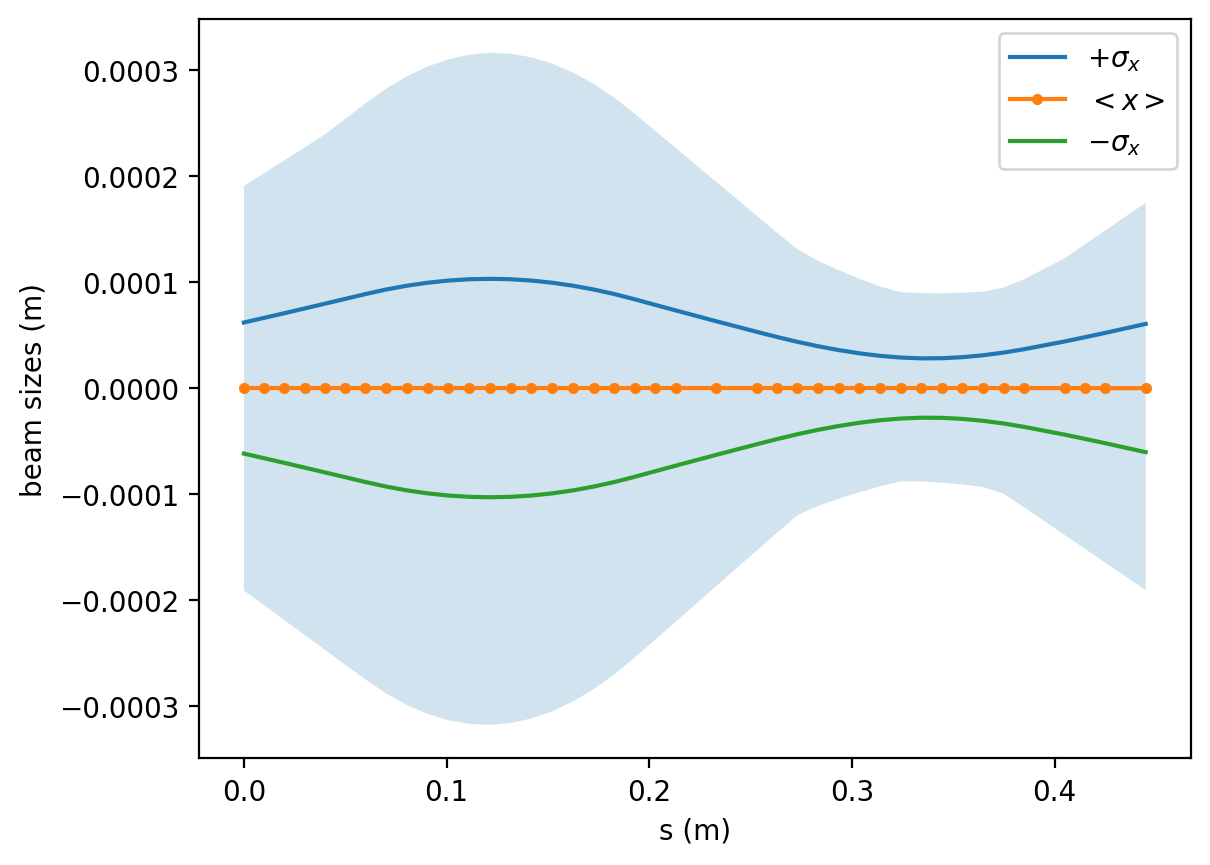

In [20]:
s = tao.bunch_comb('s')
mean_x = tao.bunch_comb('x')
max_x = mean_x + tao.bunch_comb('rel_max.1')
min_x = mean_x + tao.bunch_comb('rel_min.1')
sigma_x = np.sqrt(tao.bunch_comb('sigma.11'))
fig, ax = plt.subplots()

ax.fill_between(s, min_x, max_x, alpha=0.2)
ax.plot(s, sigma_x, label=r'$+\sigma_x$')
ax.plot(s, mean_x, label=r'$<x>$', marker='.')
ax.plot(s, -sigma_x, label=r'$-\sigma_x$')
ax.set_xlabel('s (m)')
ax.set_ylabel('beam sizes (m)')
plt.legend()


Beam betas

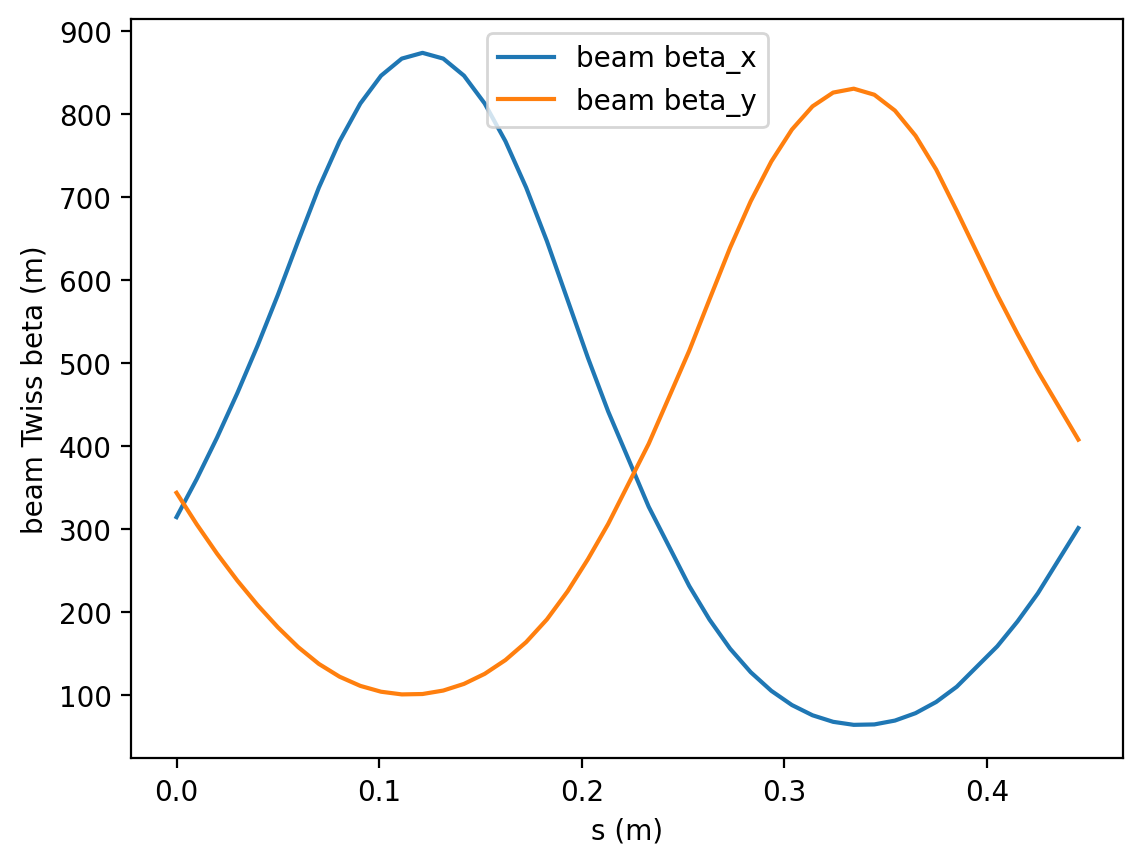

In [21]:
plt.plot(tao.bunch_comb('s'), 1000*tao.bunch_comb('x.beta'), label='beam beta_x')
plt.plot(tao.bunch_comb('s'), 1000*tao.bunch_comb('y.beta'), label='beam beta_y')
plt.xlabel('s (m)')
plt.ylabel('beam Twiss beta (m)')
plt.legend()